# Explanatory Data Analysis (EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import rcParams

## Concat Dataset and Add `city` and `is_weekend` columns

In [54]:
cities = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 
          'lisbon', 'london', 'paris', 'rome', 'vienna']
dataframes = []

for city in cities:
    df_weekday = pd.read_csv(f'../datasets/{city}_weekdays.csv')
    df_weekend = pd.read_csv(f'../datasets/{city}_weekends.csv')
    
    df_weekday['city'] = city.capitalize()
    df_weekday['is_weekend'] = 0
    df_weekend['city'] = city.capitalize()
    df_weekend['is_weekend'] = 1
    
    dataframes.append(df_weekday)
    dataframes.append(df_weekend)

concat_df = pd.concat(dataframes, ignore_index=True)

In [55]:
concat_df.head(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,is_weekend
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,0
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,0
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,0
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,0
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,0


## Univariate Analysis

In [56]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

### Group features into **categorical** and **numerical**

In [61]:
categorical_features = ['room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'bedrooms', 'city', 'is_weekend']
numerical_features = ['realSum', 'cleanliness_rating', 'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']

In [62]:
# Convert data type
concat_df['person_capacity'] = concat_df['person_capacity'].astype(int)

### Univariate Analysis for **Categorical Features**

C:\Users\fizuf\AppData\Local\Temp\ipykernel_29080\3271100962.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


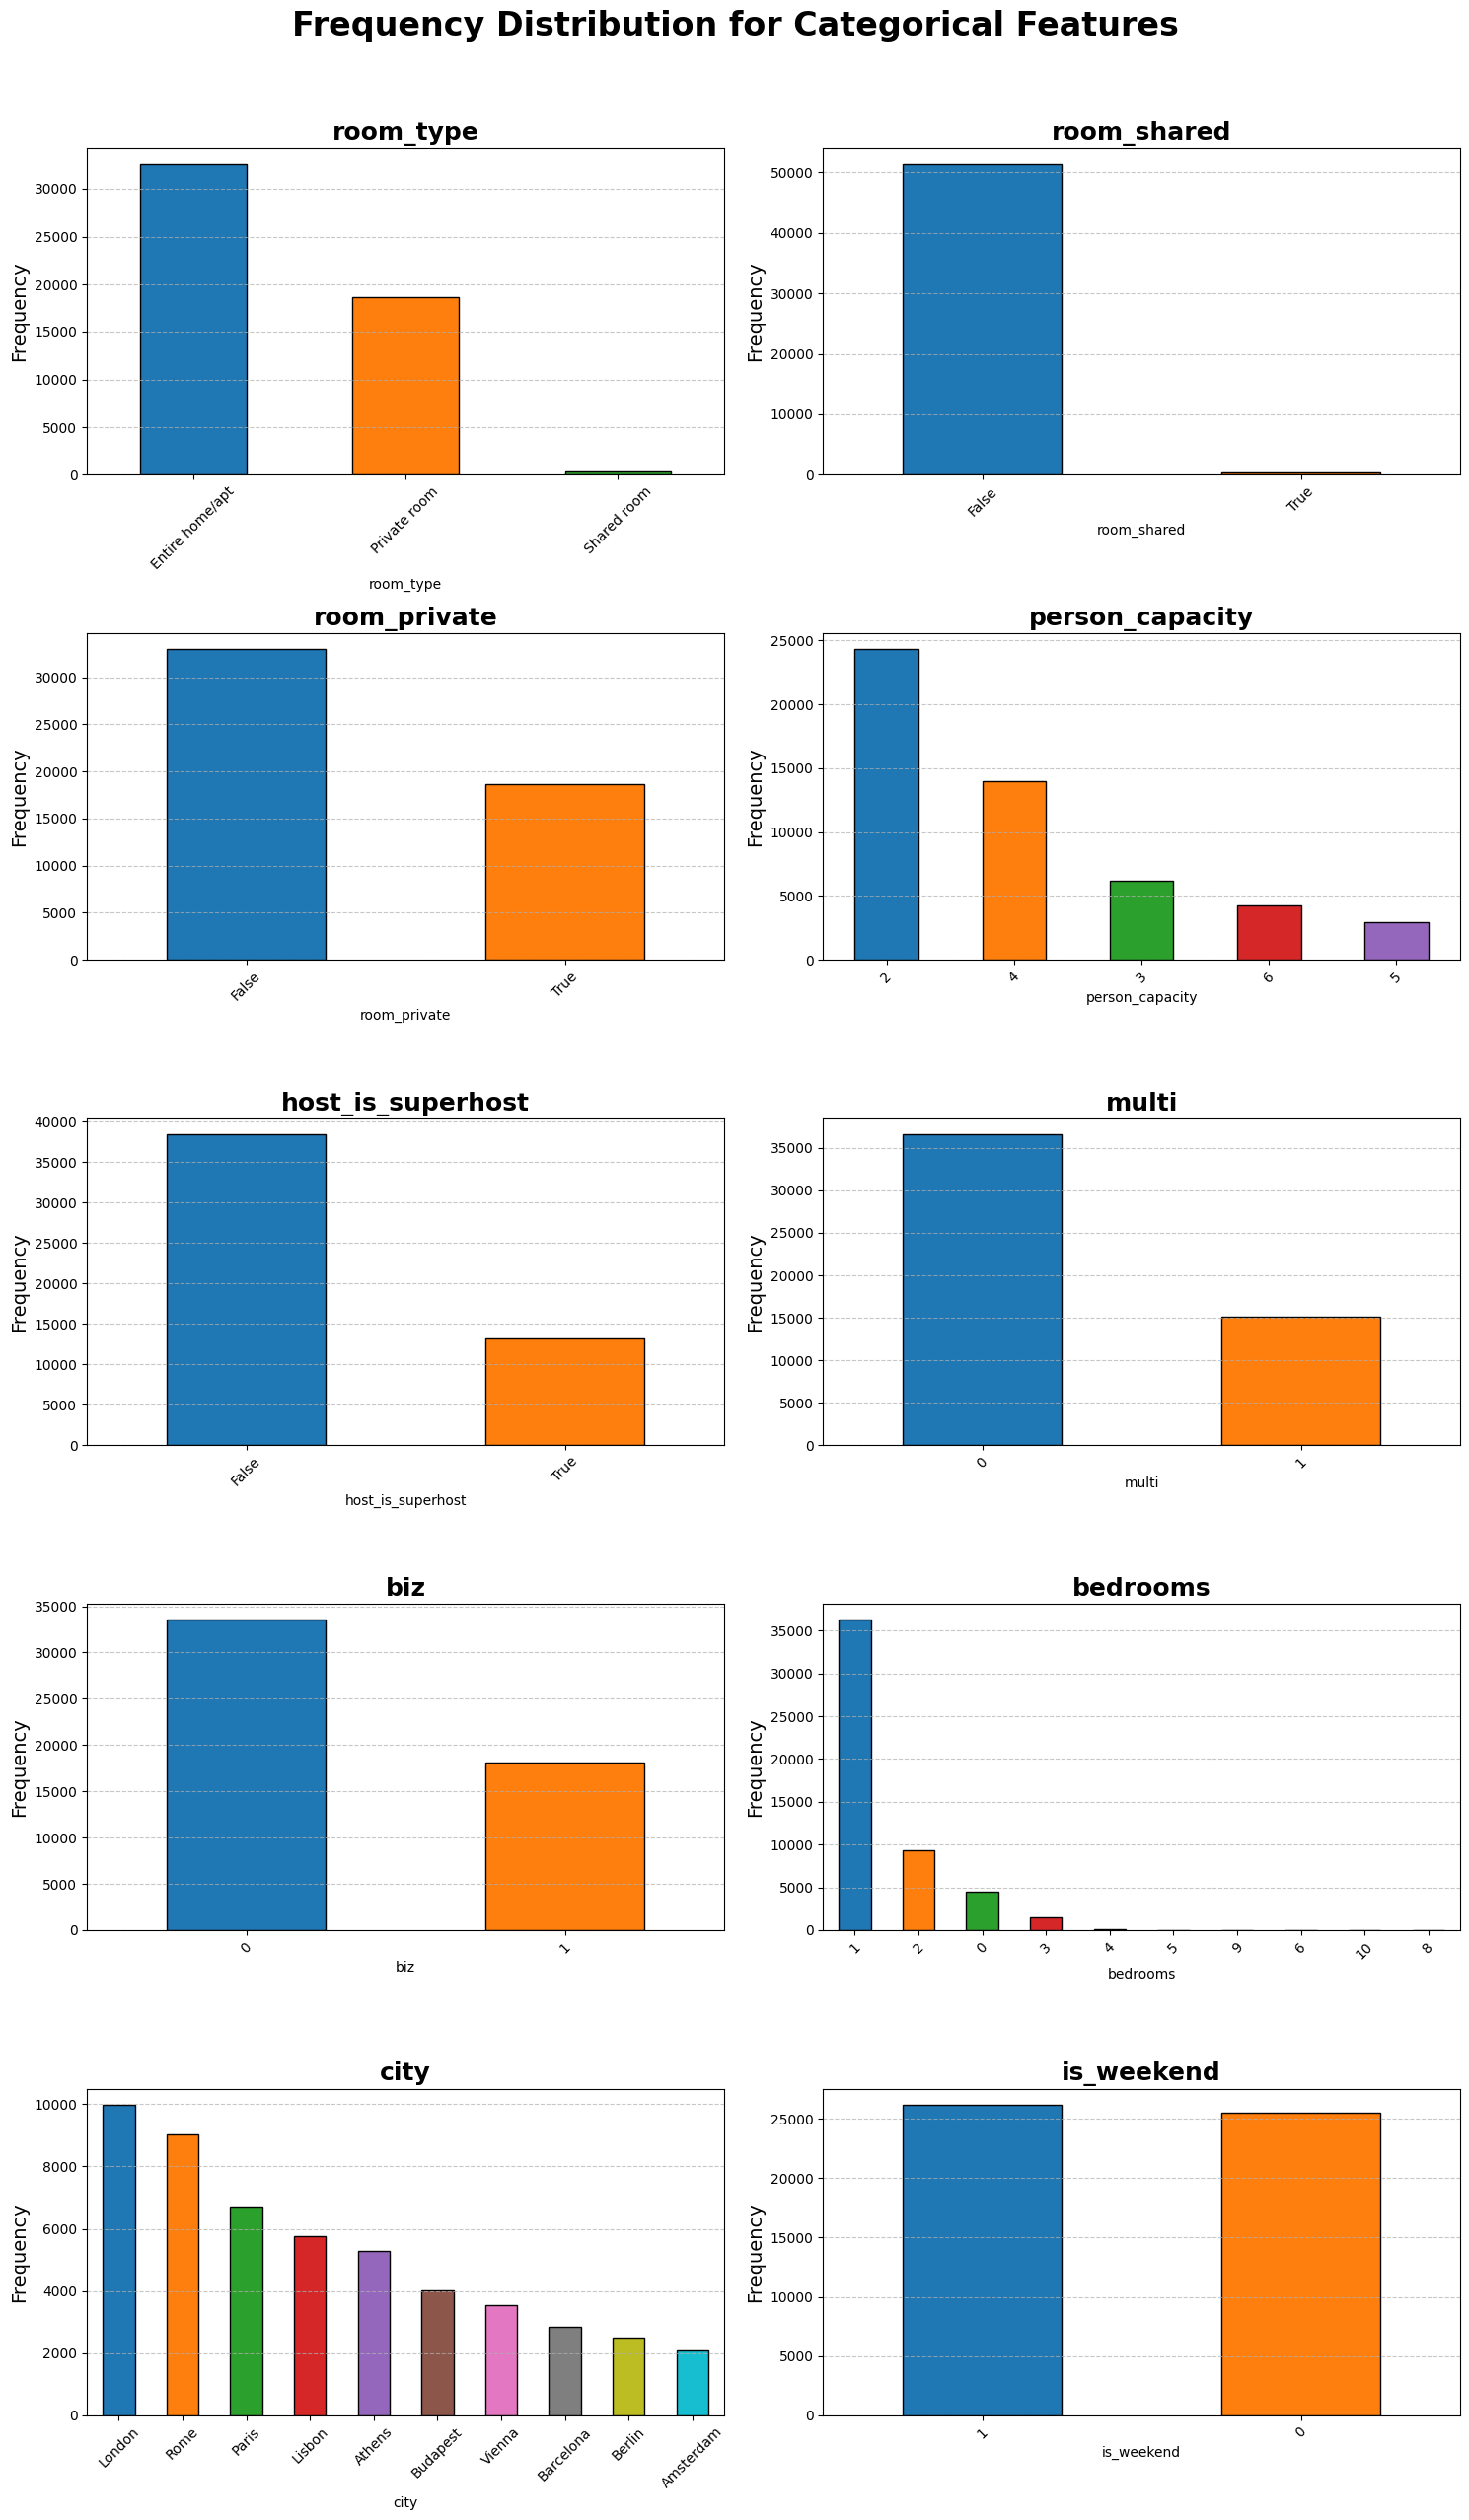

In [ ]:
num_rows = (len(categorical_features) + 1) // 2 
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows), constrained_layout=True)

fig.suptitle("Frequency Distribution for Categorical Features", fontsize=24, fontweight='bold', y=1.02)

for i, column in enumerate(categorical_features):
    row, col = divmod(i, 2) 
    ax = axes[row, col]
    
    value_counts = concat_df[column].value_counts()
    colors = plt.cm.tab10(range(len(value_counts)))
    
    value_counts.plot(kind="bar", ax=ax, color=colors, edgecolor="grey")
    
    ax.set_title(f"{column}", fontsize=18, fontweight='bold')
    ax.set_ylabel("Frequency", fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', labelrotation=45)

for j in range(len(categorical_features), num_rows * 2):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### Univariate Analysis for **Numerical Features**

In [67]:
concat_df[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
realSum,51707.0,279.879591,327.948386,34.779339,148.752174,211.343089,319.694287,18545.450285
cleanliness_rating,51707.0,9.390624,0.954868,2.000000,9.000000,10.000000,10.000000,10.000000
guest_satisfaction_overall,51707.0,92.628232,8.945531,20.000000,90.000000,95.000000,99.000000,100.000000
dist,51707.0,3.191285,2.393803,0.015045,1.453142,2.613538,4.263077,25.284557
metro_dist,51707.0,0.681540,0.858023,0.002301,0.248480,0.413269,0.737840,14.273577
attr_index,51707.0,294.204105,224.754123,15.152201,136.797385,234.331748,385.756381,4513.563486
attr_index_norm,51707.0,13.423792,9.807985,0.926301,6.380926,11.468305,17.415082,100.000000
rest_index,51707.0,626.856696,497.920226,19.576924,250.854114,522.052783,832.628988,6696.156772
rest_index_norm,51707.0,22.786177,17.804096,0.592757,8.751480,17.542238,32.964603,100.000000
lng,51707.0,7.426068,9.799725,-9.226340,-0.072500,4.873000,13.518825,23.786020


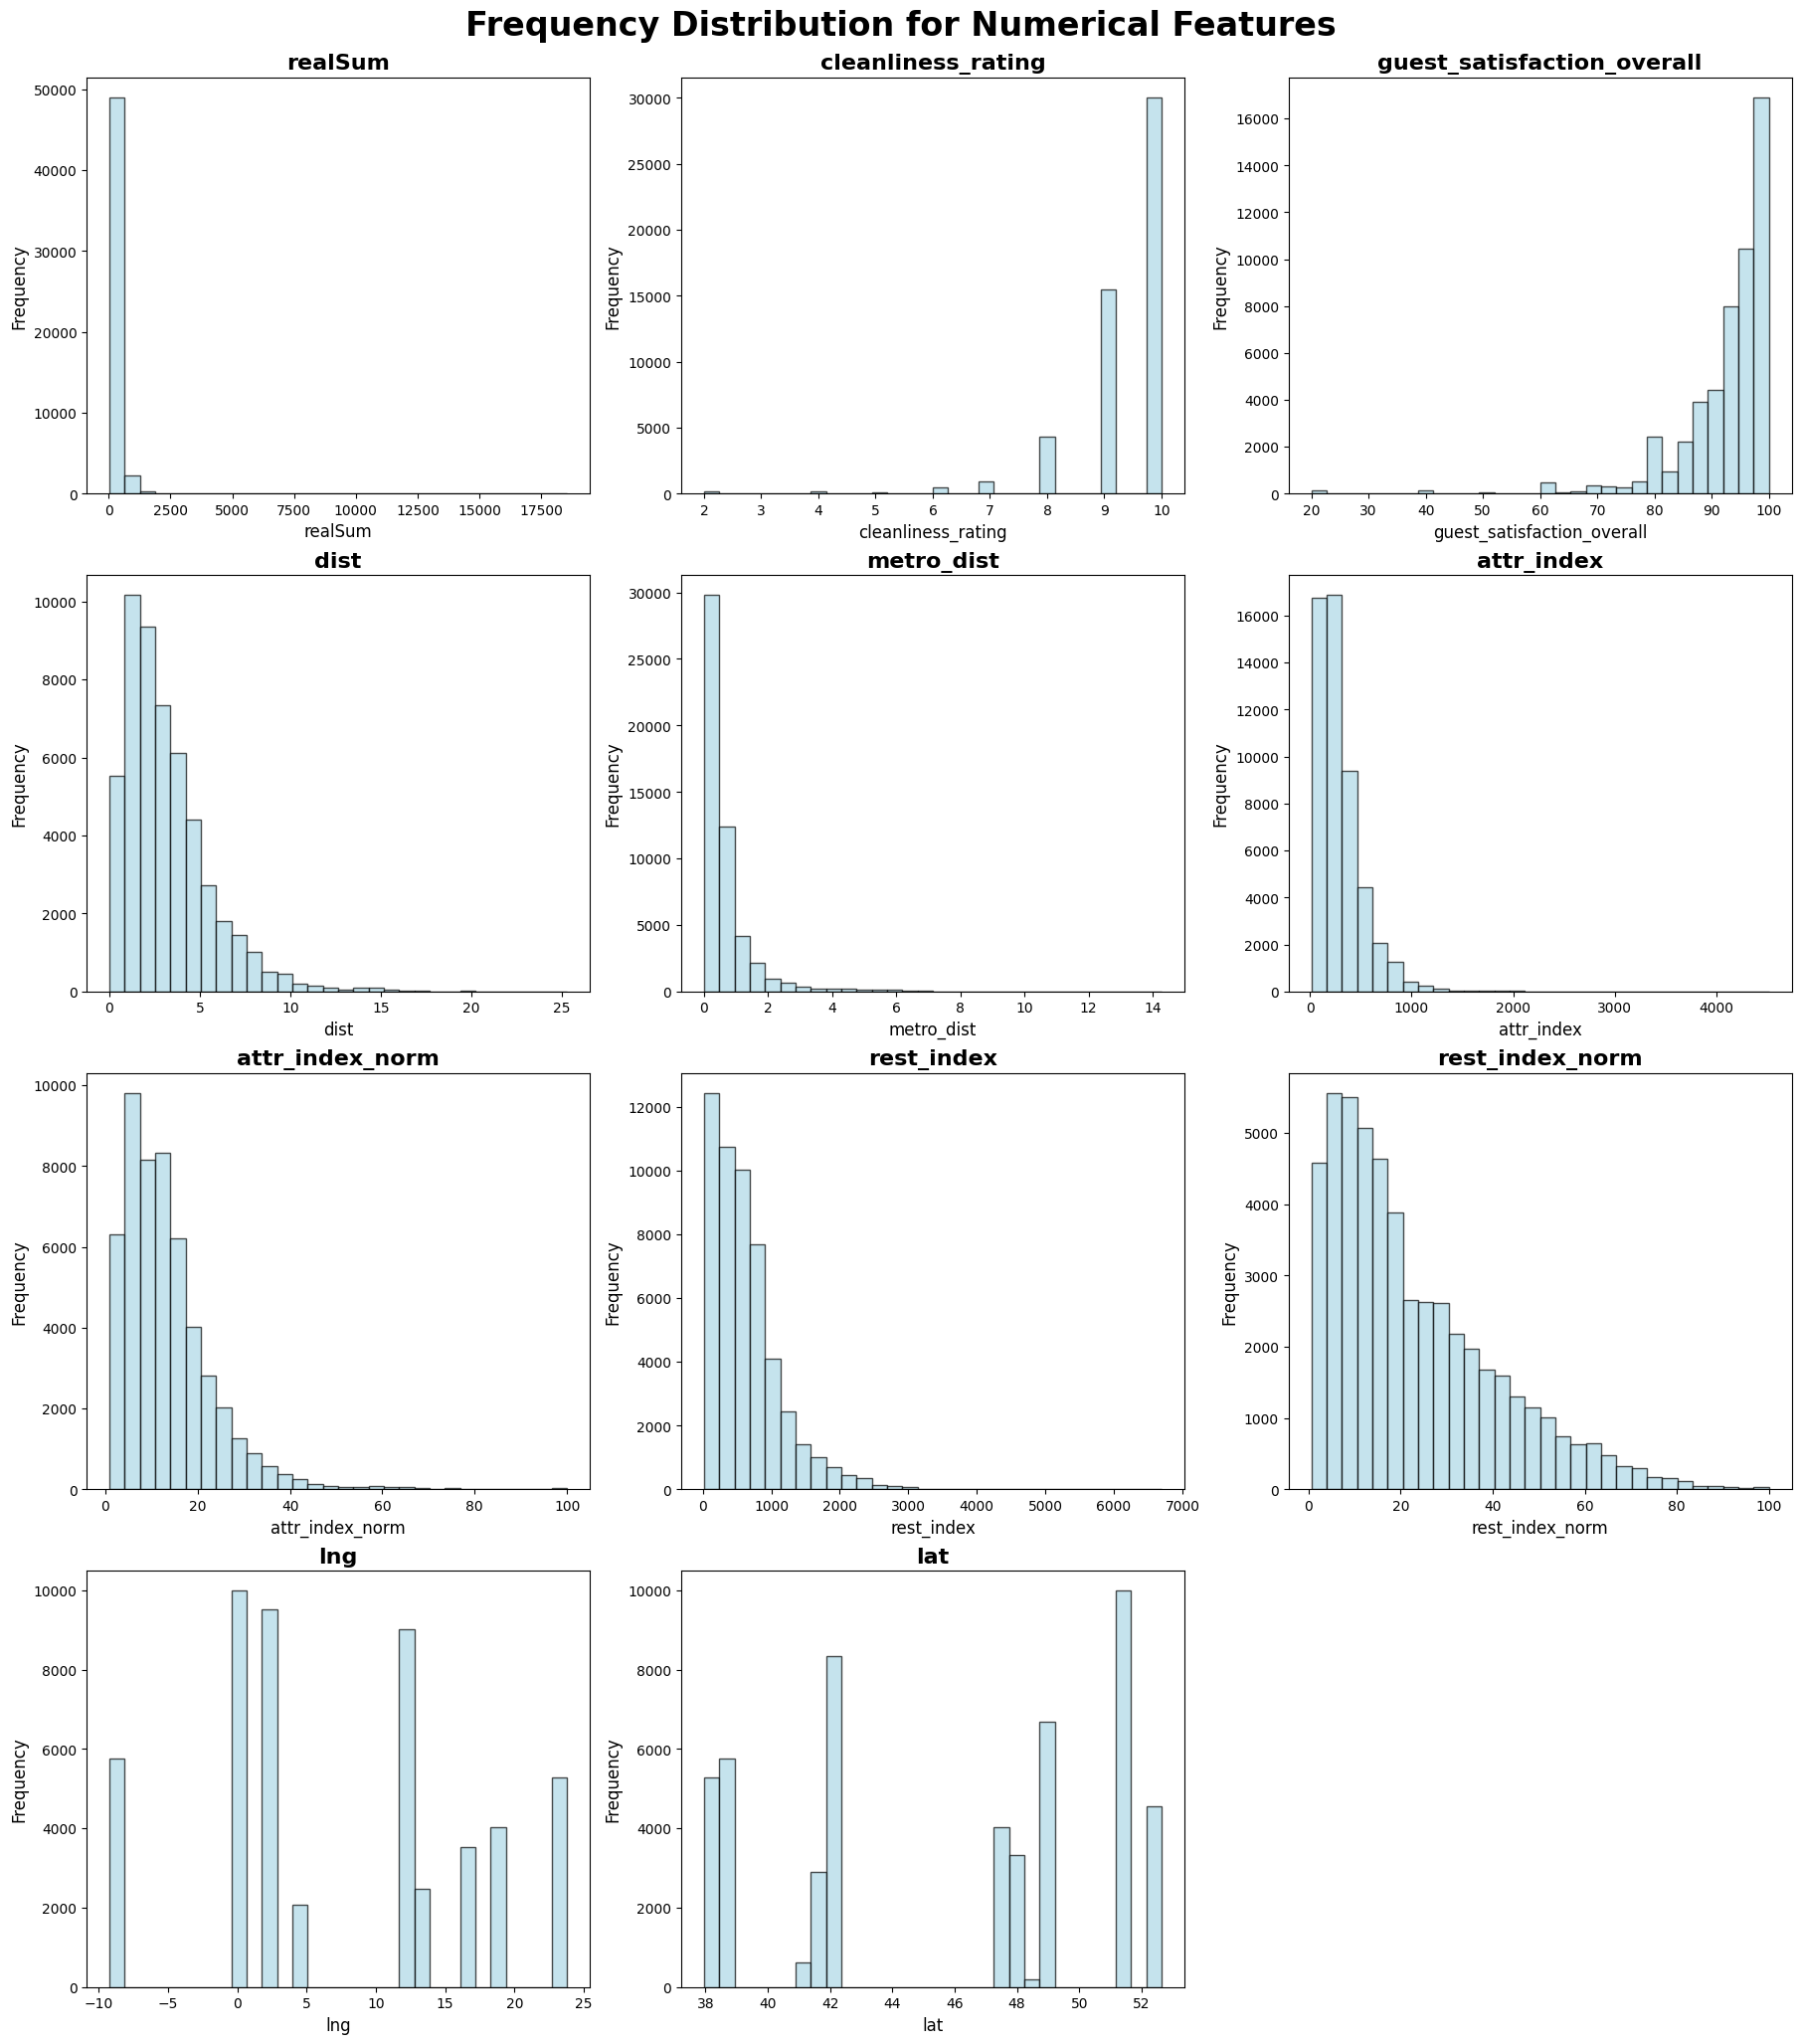

In [ ]:
num_features = len(numerical_features)
num_rows = (num_features + 2) // 3 

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("Frequency Distribution for Numerical Features", fontsize=24, fontweight='bold', y=1.02)
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    concat_df[col].plot(
        kind="hist", bins=30, color="lightblue", alpha=0.7, edgecolor="black", ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


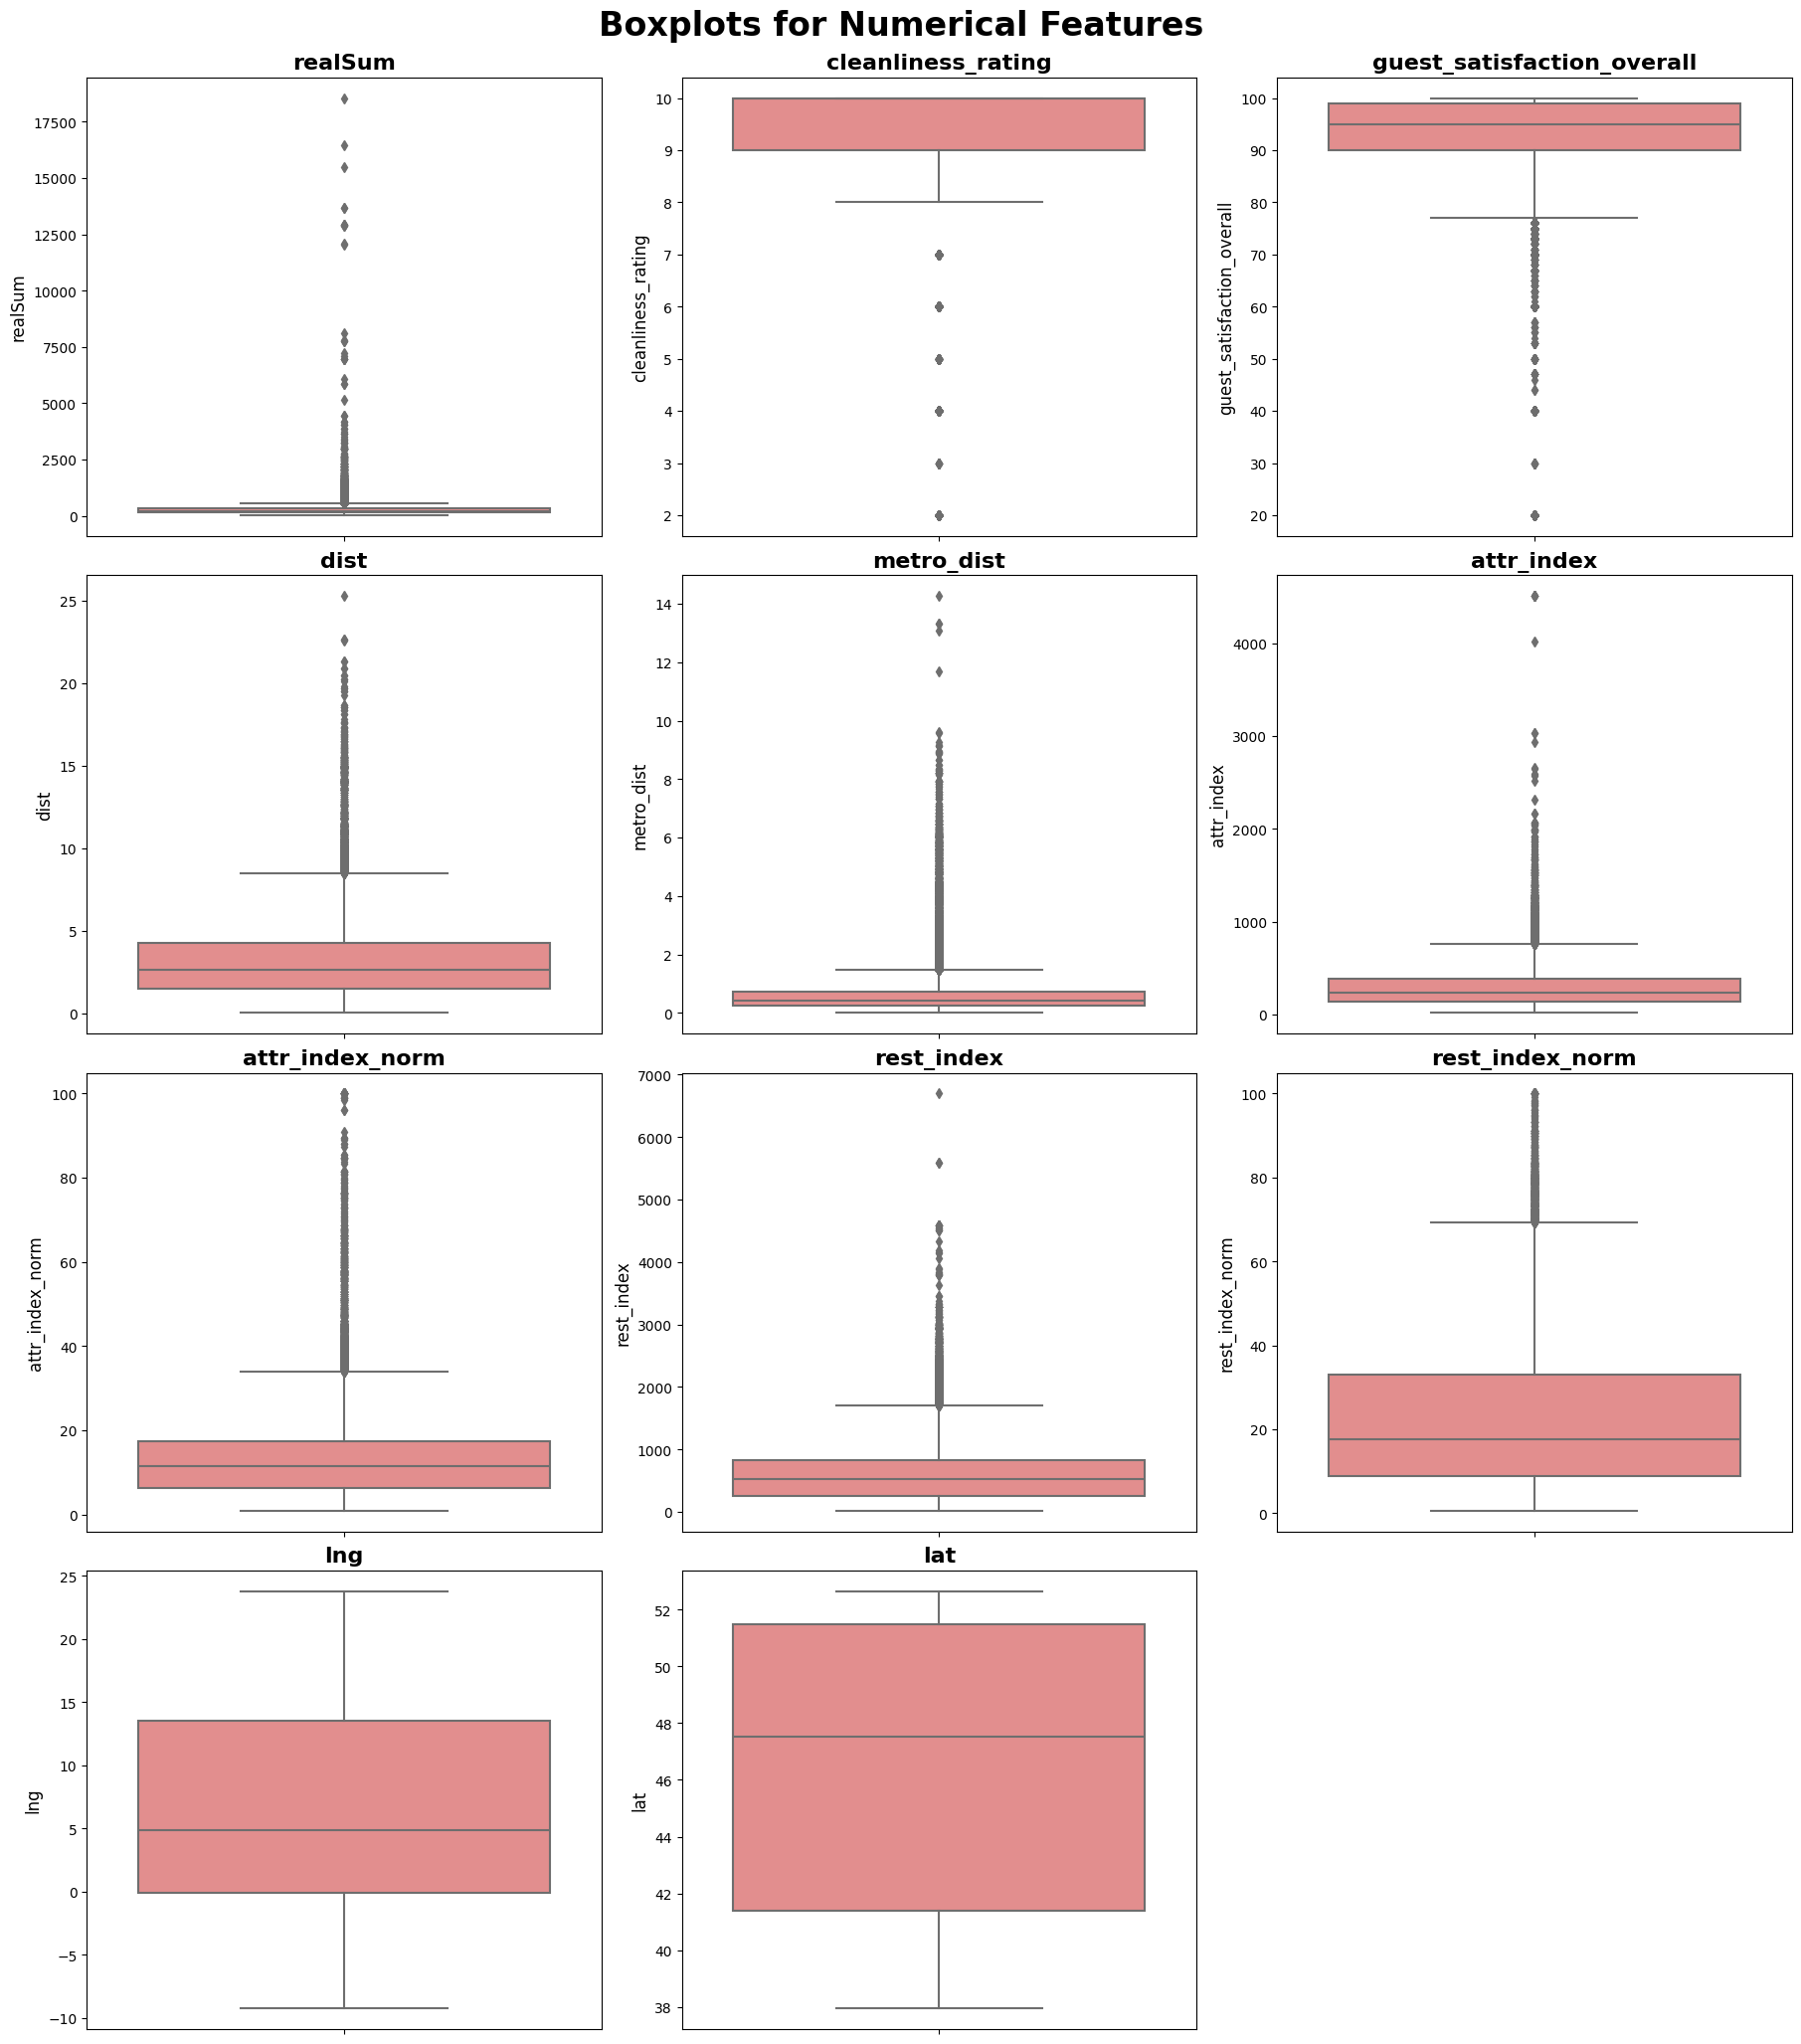

In [72]:
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("Boxplots for Numerical Features", fontsize=24, fontweight='bold', y=1.02)
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(data=concat_df, y=col, ax=axes[i], color="lightcoral")
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_ylabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

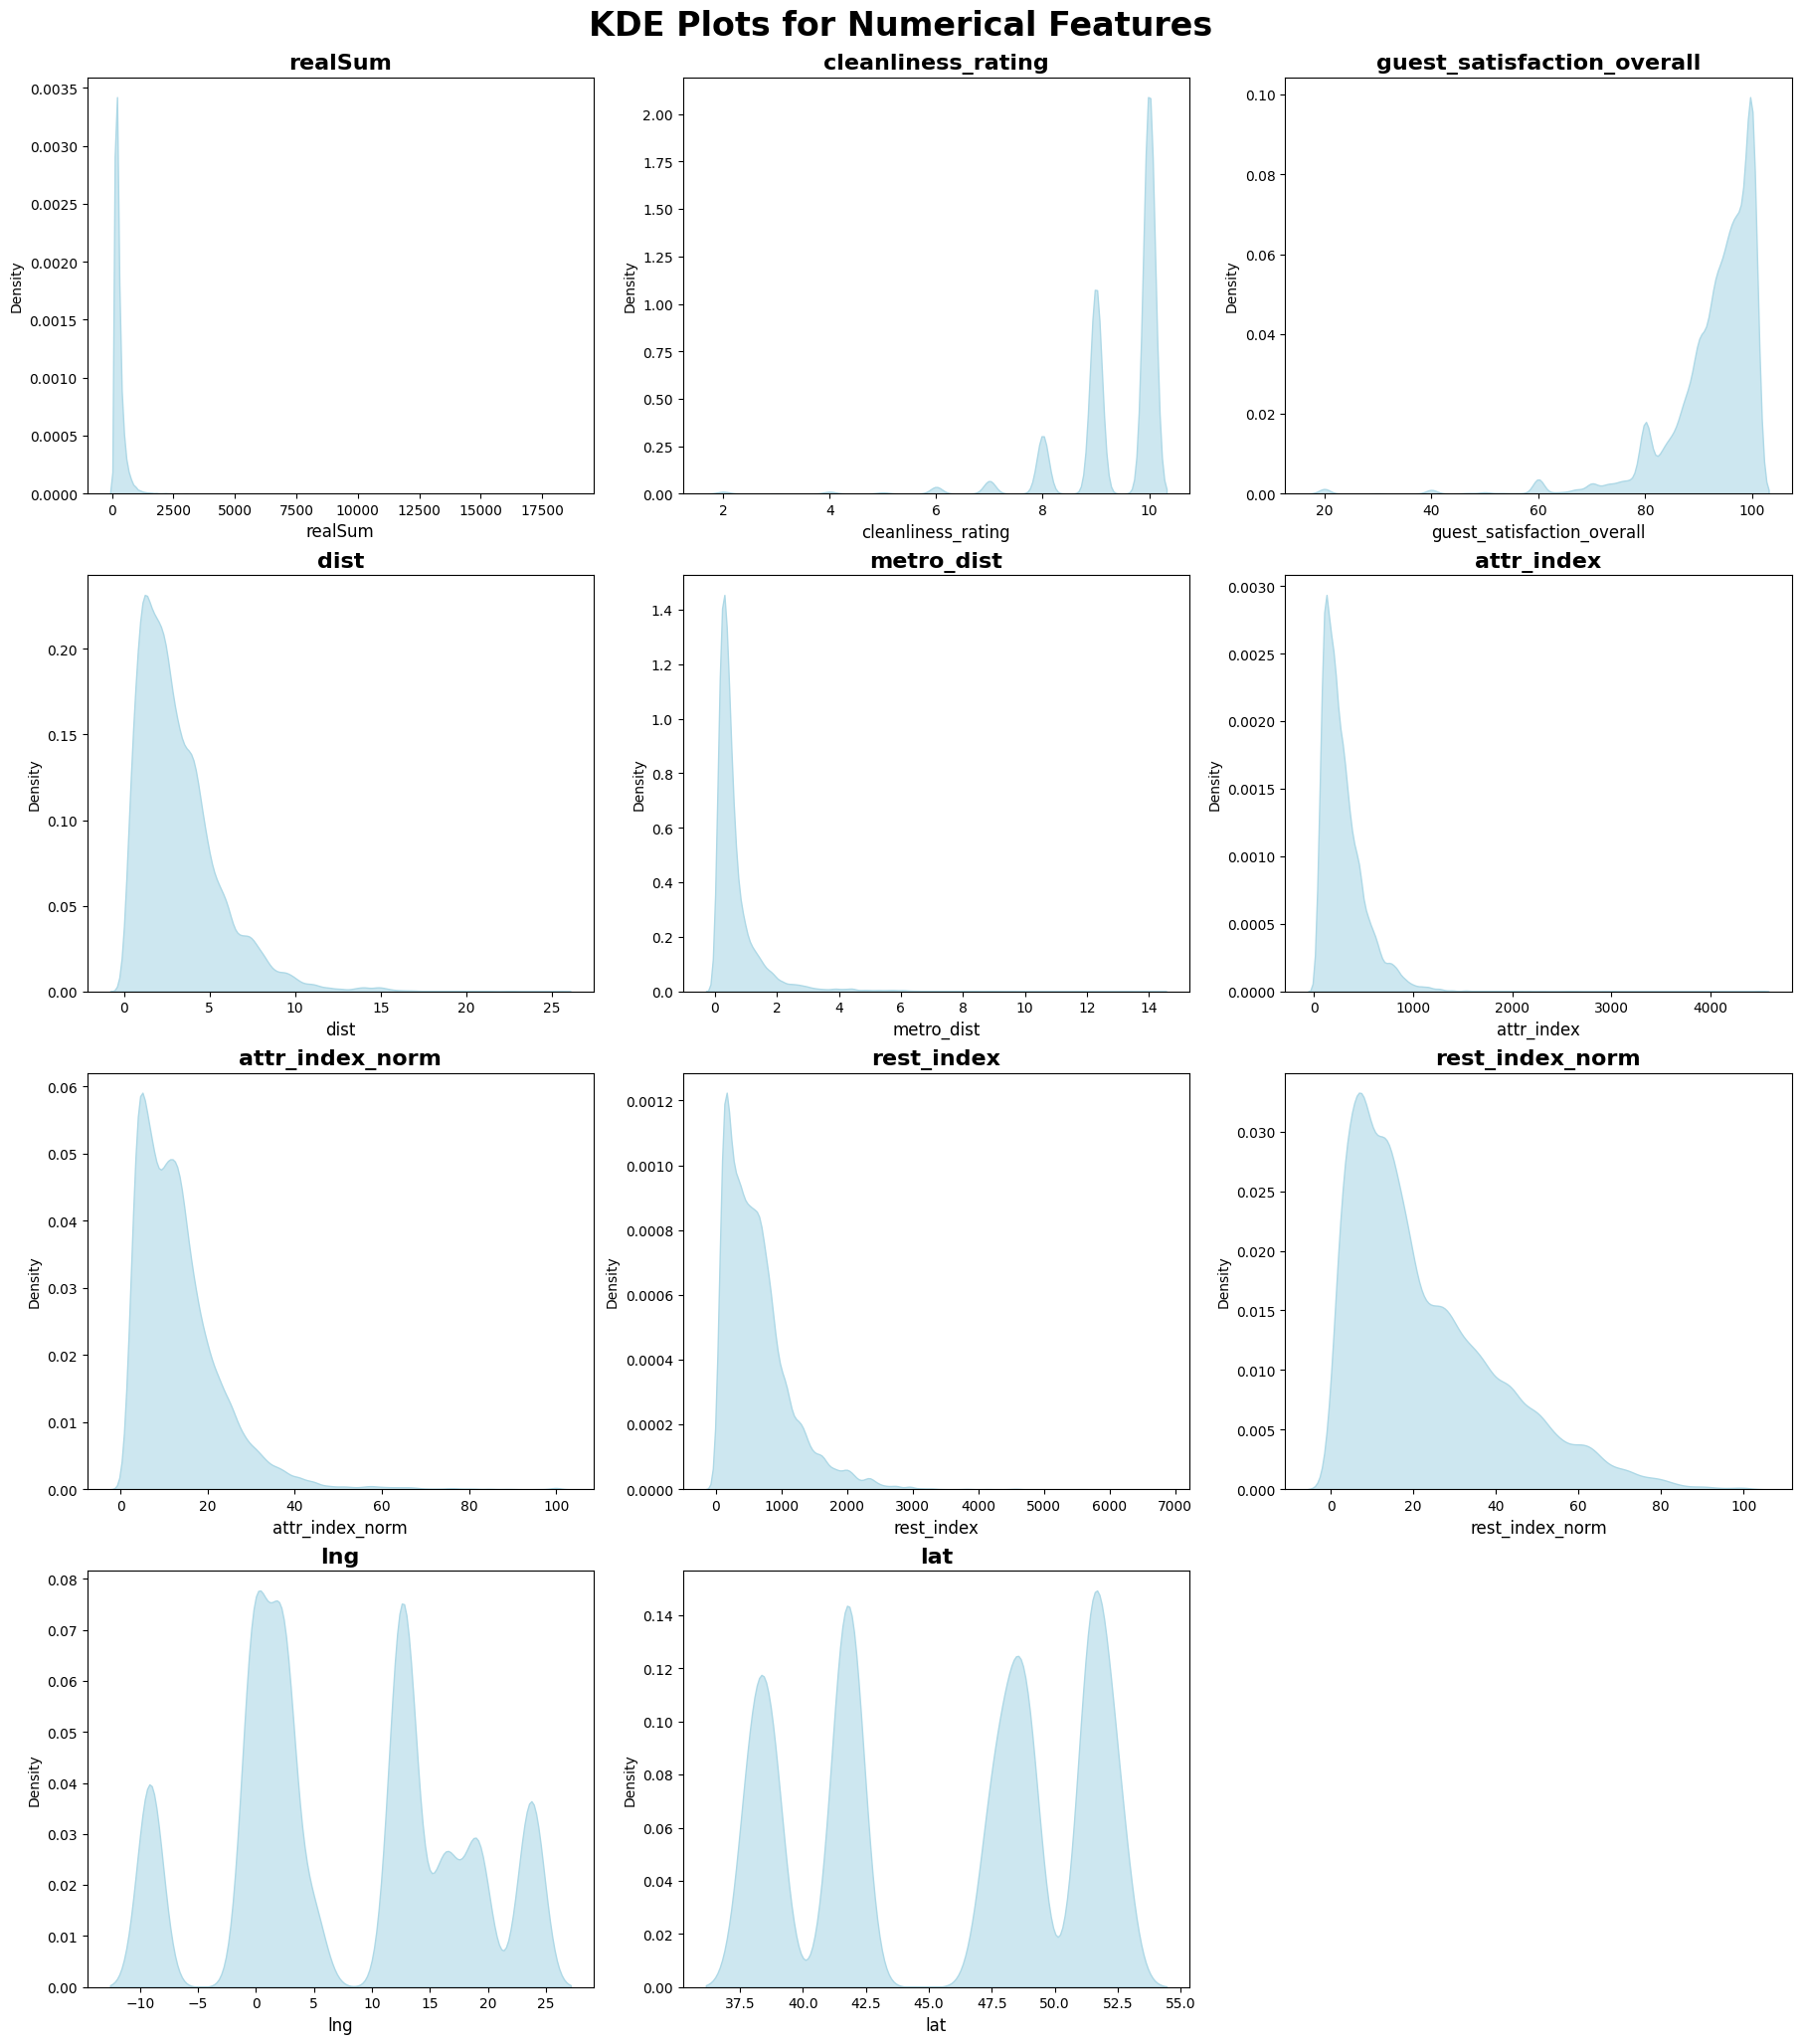

In [90]:
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("KDE Plots for Numerical Features", fontsize=24, fontweight='bold', y=1.02)
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=concat_df, x=col, ax=axes[i], fill=True, color="lightblue", alpha=0.6)
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

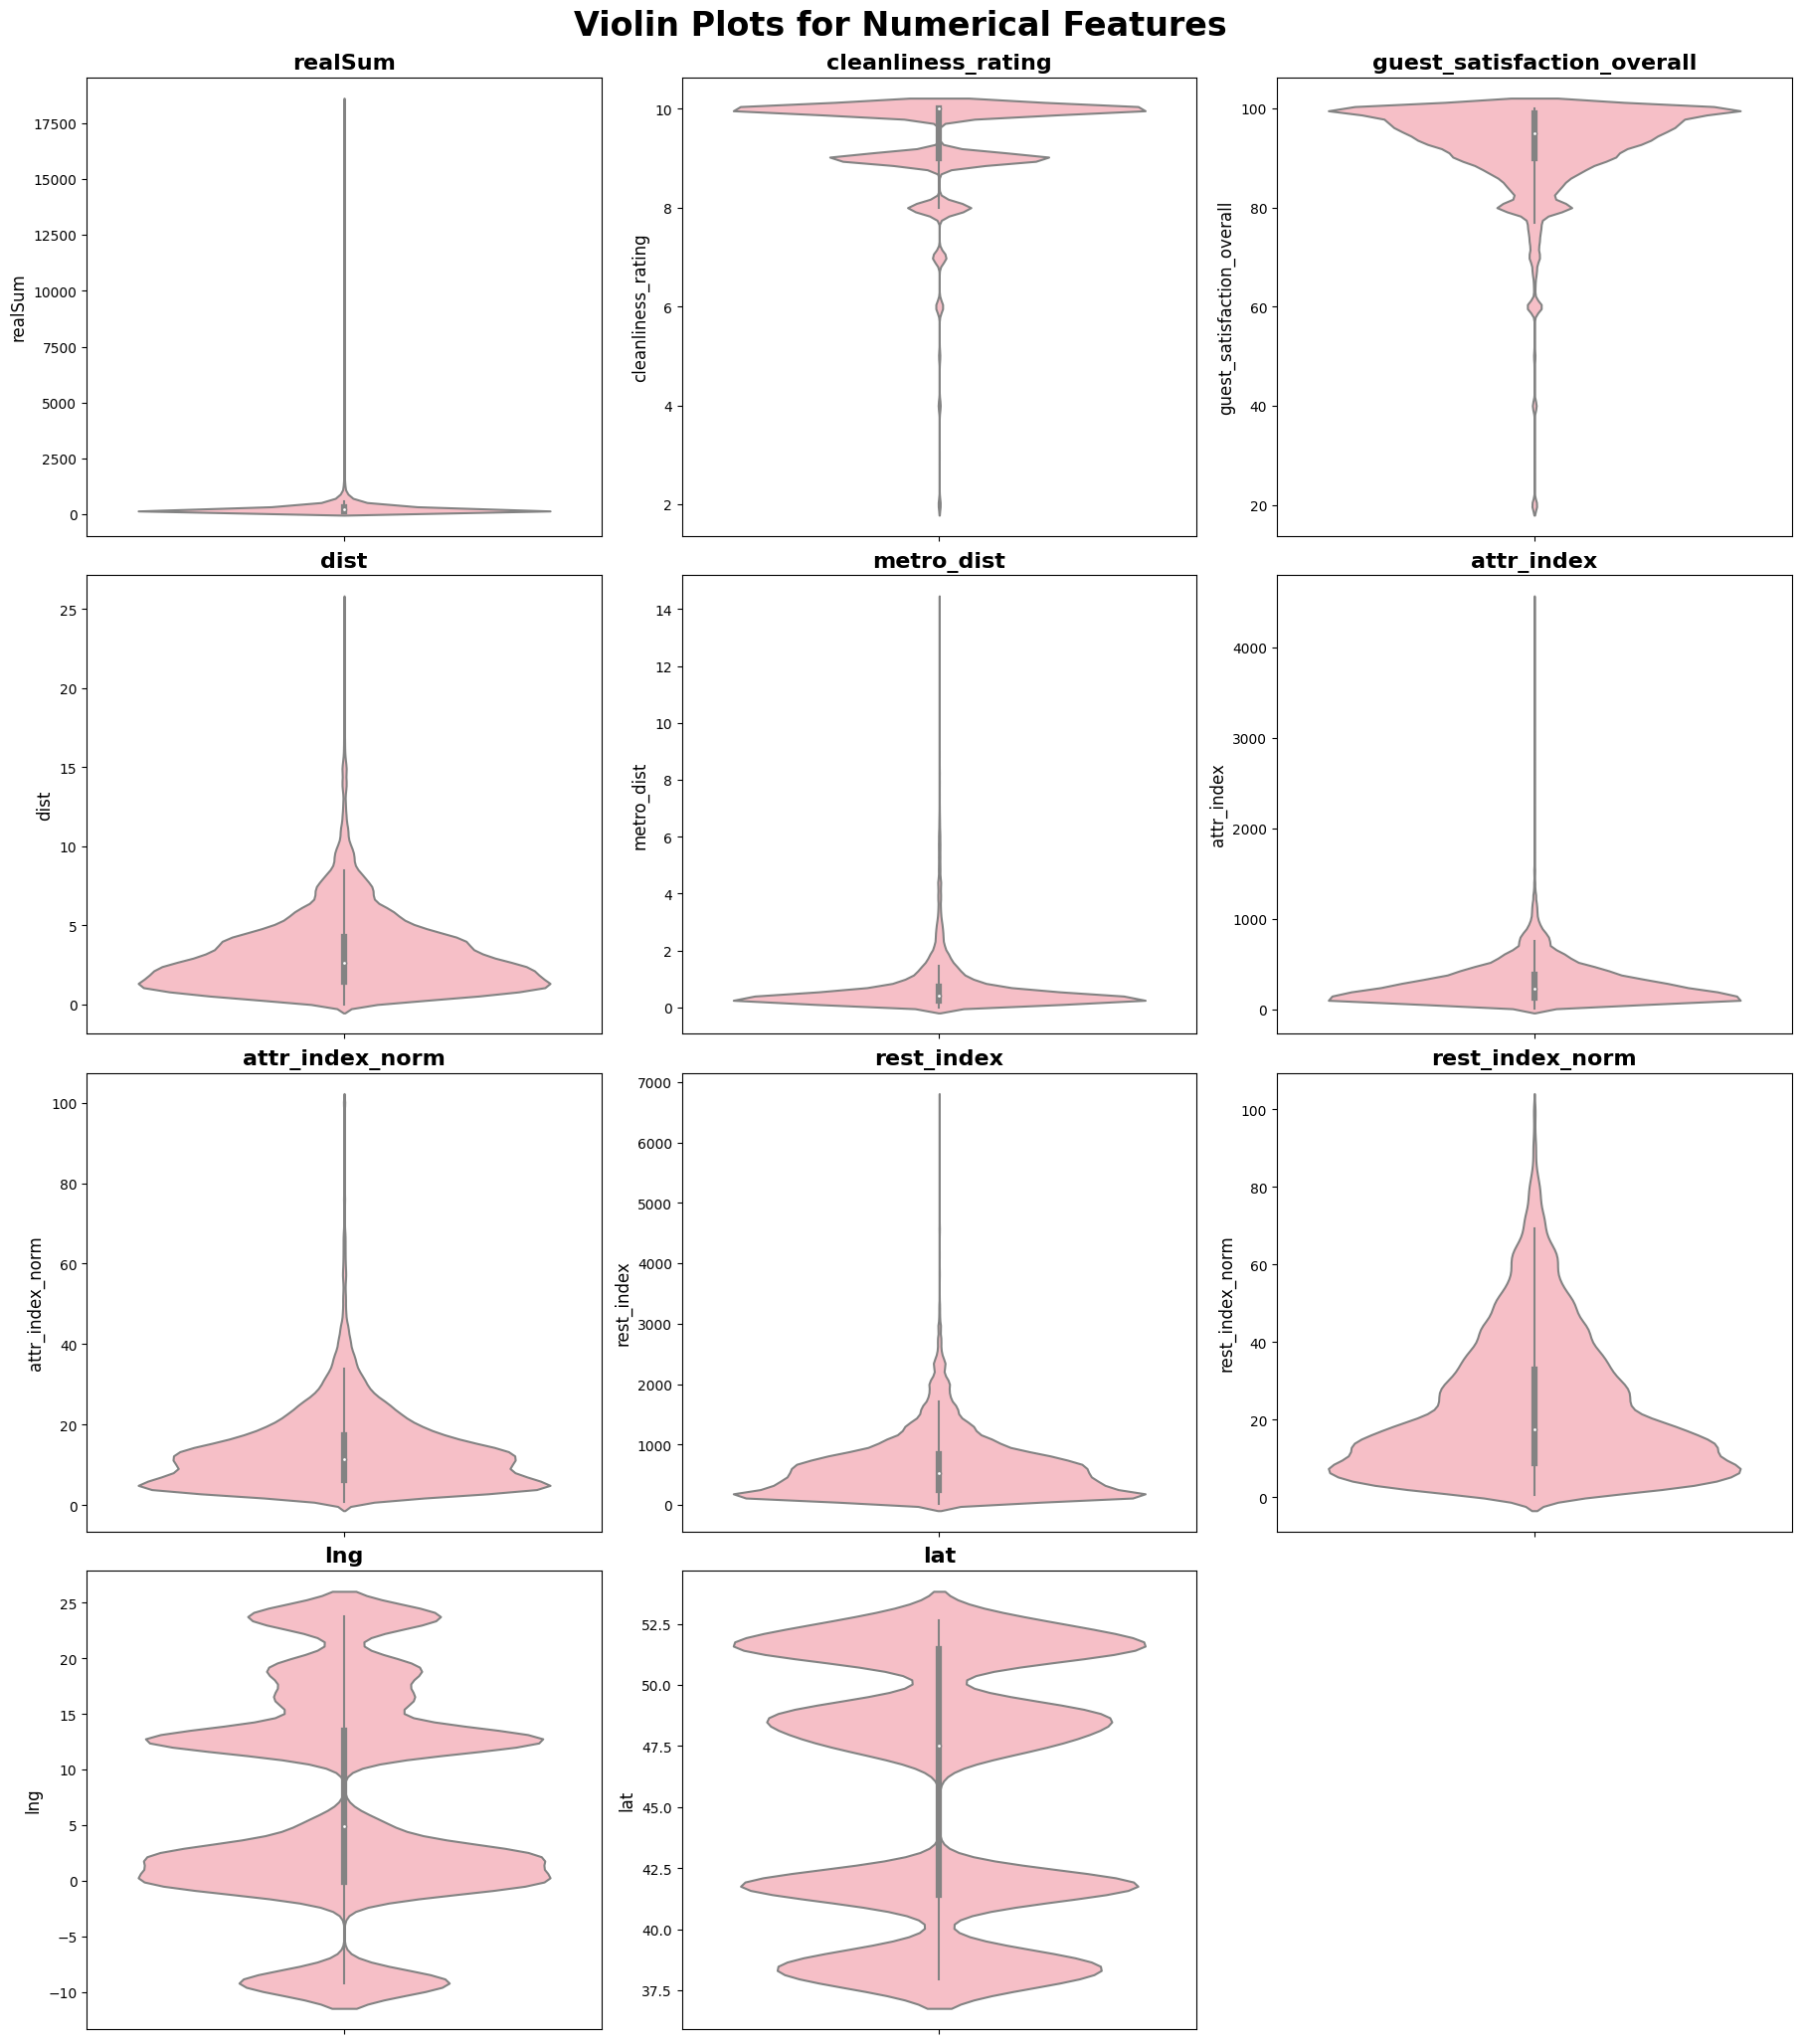

In [75]:
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("Violin Plots for Numerical Features", fontsize=24, fontweight='bold', y=1.02)
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.violinplot(data=concat_df, y=col, ax=axes[i], color="lightpink")
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_ylabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

## Multivariate Analysis

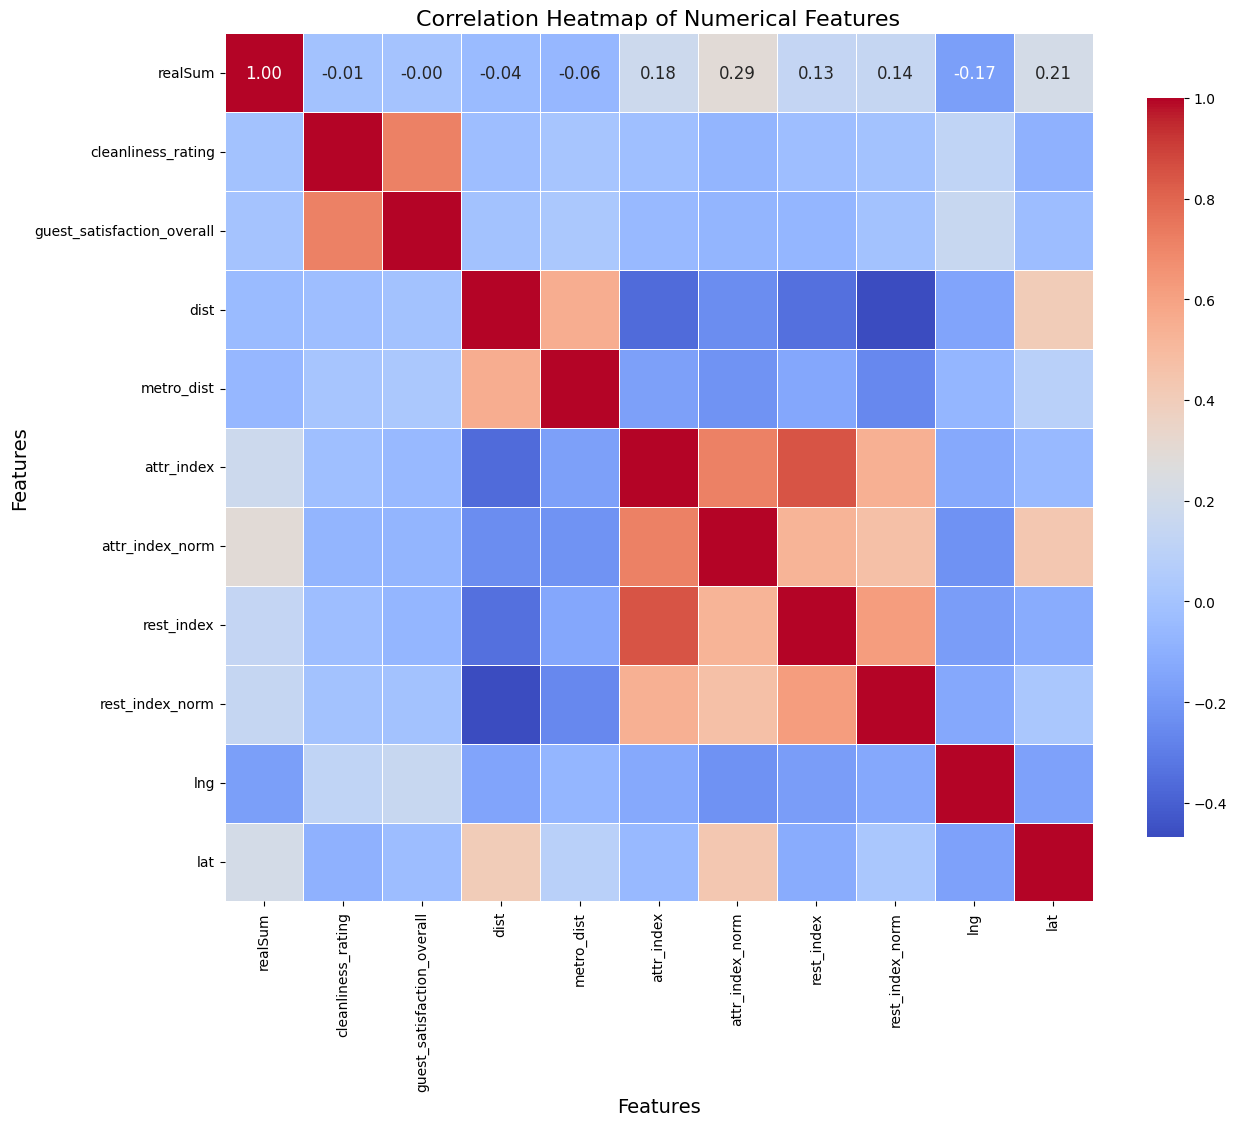

In [82]:
correlation_matrix = correlation_matrix.fillna(0)

plt.figure(figsize=(14, 12)) 
sns.heatmap(
    correlation_matrix, 
    annot=True,            
    cmap='coolwarm',       
    fmt=".2f",             
    annot_kws={'size': 12},  
    cbar_kws={'shrink': 0.8},  
    linewidths=0.5,        
    square=True,           
    xticklabels=correlation_matrix.columns,  
    yticklabels=correlation_matrix.index,   
    cbar=True
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.show()

In [86]:
skewness = concat_df[numerical_features].skew()
kurtosis = concat_df[numerical_features].kurt()
print(f"Skewness:\n{skewness}")
print(f"Kurtosis:\n{kurtosis}")

Skewness:
realSum                       21.419957
cleanliness_rating            -2.850286
guest_satisfaction_overall    -3.174908
dist                           1.731195
metro_dist                     4.060445
attr_index                     2.759981
attr_index_norm                2.193167
rest_index                     1.694356
rest_index_norm                1.097455
lng                            0.033301
lat                           -0.179583
dtype: float64
Kurtosis:
realSum                       831.355861
cleanliness_rating             13.611255
guest_satisfaction_overall     17.022341
dist                            4.969597
metro_dist                     23.703047
attr_index                     23.037393
attr_index_norm                 9.351918
rest_index                      4.751236
rest_index_norm                 0.782896
lng                            -1.003388
lat                            -1.554394
dtype: float64


c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

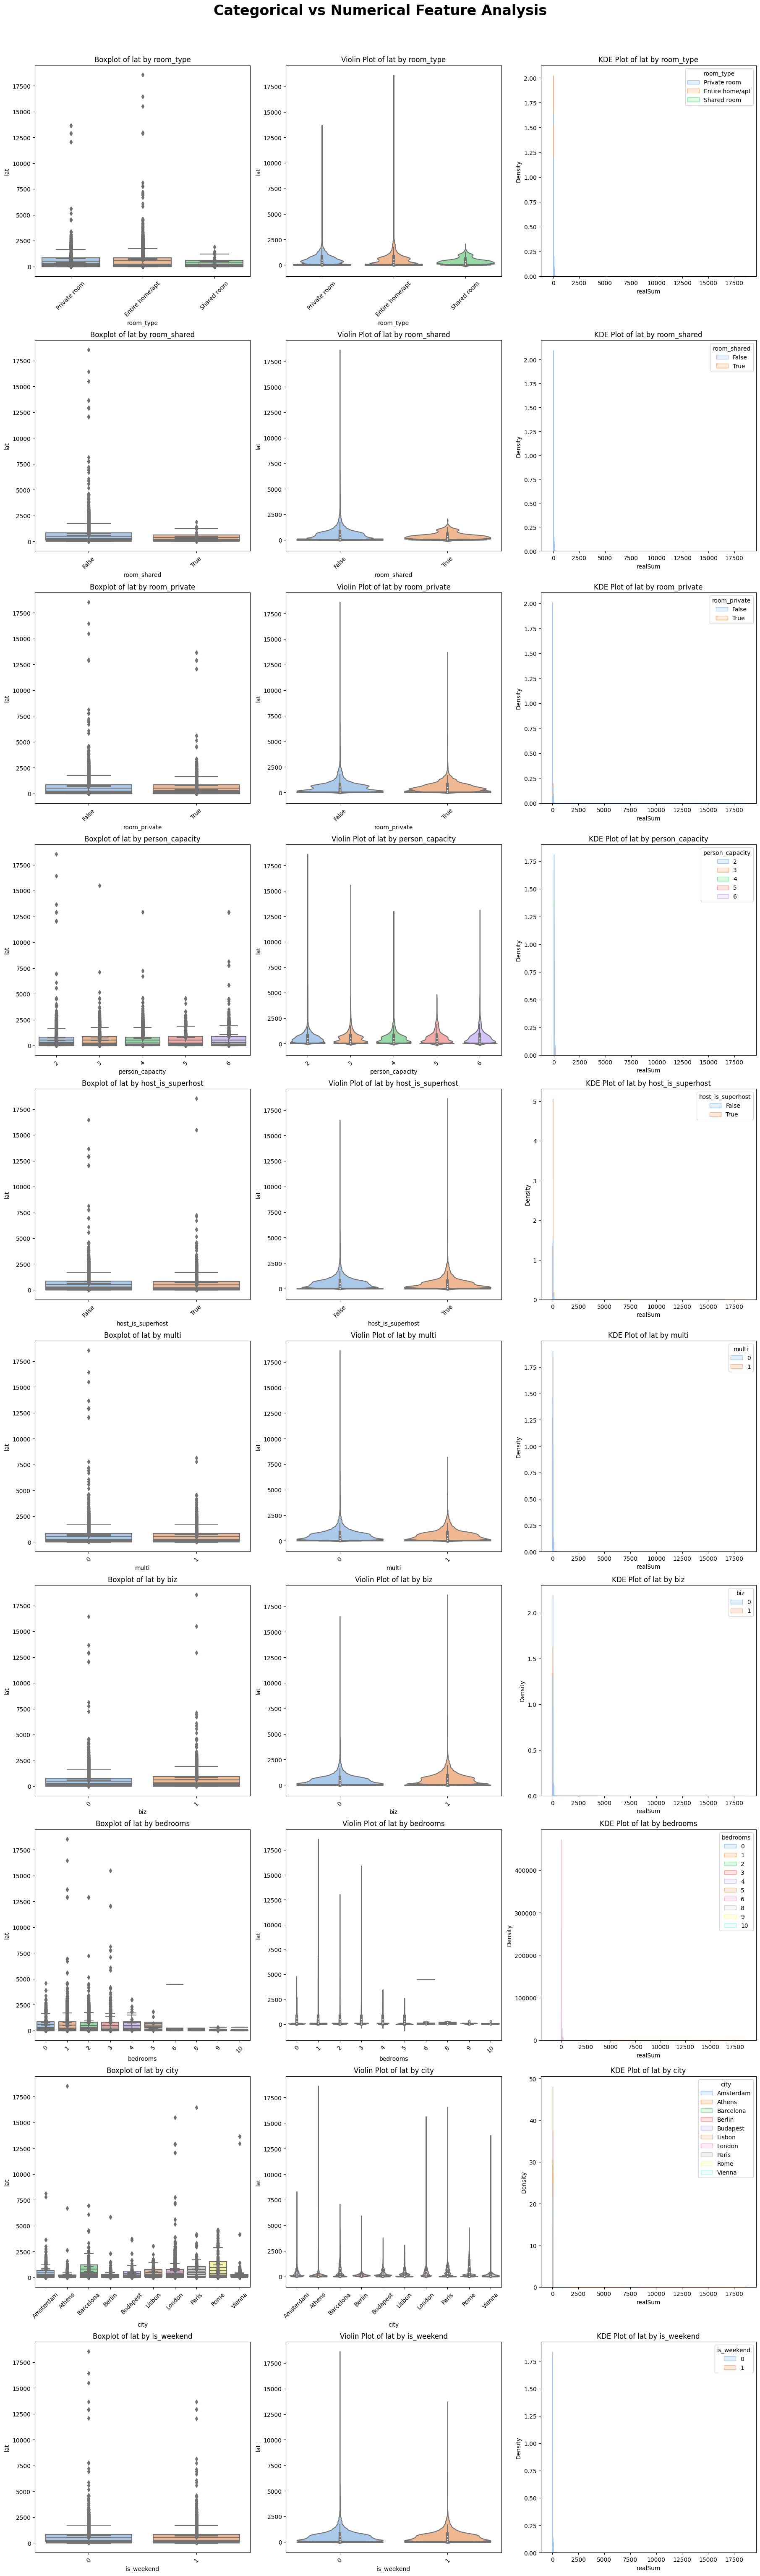

In [88]:
fig, axes = plt.subplots(len(categorical_features), 3, figsize=(18, 6 * len(categorical_features)), constrained_layout=True)

# Iterate through categorical and numerical features to create plots
for i, col in enumerate(categorical_features):
    # Boxplot (1st column in the subplot grid)
    for j, num_col in enumerate(numerical_features):
        sns.boxplot(x=col, y=num_col, data=concat_df, ax=axes[i, 0], palette='pastel')
        axes[i, 0].set_title(f'Boxplot of {num_col} by {col}')
        axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=45)
    
    # Violin plot (2nd column in the subplot grid)
    for j, num_col in enumerate(numerical_features):
        sns.violinplot(x=col, y=num_col, data=concat_df, ax=axes[i, 1], palette='pastel')
        axes[i, 1].set_title(f'Violin Plot of {num_col} by {col}')
        axes[i, 1].set_xticklabels(axes[i, 1].get_xticklabels(), rotation=45)
    
    # KDE plot (3rd column in the subplot grid)
    for j, num_col in enumerate(numerical_features):
        sns.kdeplot(data=concat_df, x=num_col, hue=col, fill=True, common_norm=False, palette='pastel', ax=axes[i, 2])
        axes[i, 2].set_title(f'KDE Plot of {num_col} by {col}')

# Set a big title for the whole figure
fig.suptitle("Categorical vs Numerical Feature Analysis", fontsize=24, fontweight='bold', y=1.02)

# Show the plot
plt.show()


In [22]:
concat_df.duplicated().sum()

0

- No Null data
- No duplicated data 